## Подготовка данных

In [1]:
from data_loading import *

In [ ]:
# import tensorflow as tf
# gpu_fraction = 0.5
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction)
# sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [2]:
data = generate_data("../results/ecoli_10000_1000", 10, 0)[0]

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

## Простейшая сверточная модель с одним фильтром -- не учится
## Берем с  тремя

In [11]:
from cnn_models import *
from keras.layers import Dense, Conv1D, Flatten, Input, MaxPooling1D

def create_cnn_model_1(input_size = 10):
    inp = Input(shape=(input_size, 4))
    x = Conv1D(2, kernel_size=3, activation='relu')(inp)
#     x = MaxPooling1D(2)(x)
    x = Flatten()(x)
    x = Dense(4, activation='softmax')(x)
    model = Model(inp, x)
    
    #model.add(Conv1D(3, kernel_size=3, activation='relu', input_shape=(input_size, 4)))
    #model.add(Flatten())
    #model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model
model = create_cnn_model_1(10)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 10, 4)             0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 8, 2)              26        
_________________________________________________________________
flatten_5 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 68        
Total params: 94
Trainable params: 94
Non-trainable params: 0
_________________________________________________________________


In [12]:
es = EarlyStopping(monitor='val_loss', verbose=1, patience=3)
history = model.fit(data.train1, data.train_ans, epochs=100, callbacks = [es], validation_data=(data.validate1, data.validate_ans),
                   verbose = 0)

Epoch 00007: early stopping


In [13]:
model.evaluate(data.test1, data.test_ans)

1000/1000 [==============================] - 1s 759us/step


[1.3824516201019288, 0.27300000000000002]

/home/bvdmitri/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


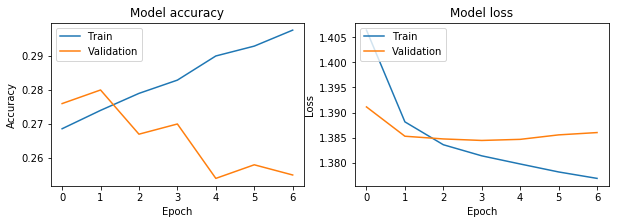

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plot_history(history.history)

In [15]:
def create_cnn_model_2(input_size = 10):
    inp = Input(shape=(input_size, 4))
    x = Conv1D(3, kernel_size=3, activation='relu')(inp)
#     x = MaxPooling1D(2)(x)
    x = Flatten()(x)
    x = Dense(4, activation='softmax')(x)
    model = Model(inp, x)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model
model = create_cnn_model_2(10)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 10, 4)             0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 8, 3)              39        
_________________________________________________________________
flatten_6 (Flatten)          (None, 24)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 100       
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


In [16]:
es = EarlyStopping(monitor='val_loss', verbose=1, patience=3)
history = model.fit(data.train1, data.train_ans, epochs=100, callbacks = [es], validation_data=(data.validate1, data.validate_ans),
                   verbose = 0)

Epoch 00012: early stopping


In [17]:
model.evaluate(data.test1, data.test_ans)

1000/1000 [==============================] - 0s 147us/step


[1.3748138217926025, 0.30399999999999999]

/home/bvdmitri/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


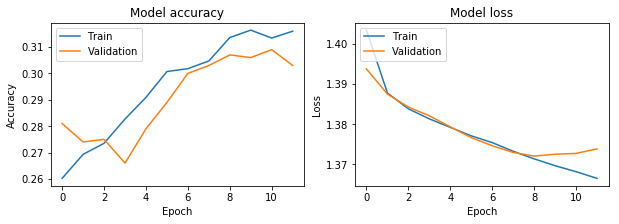

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plot_history(history.history)

In [19]:
def create_cnn_model_3(input_size = 10):
    inp = Input(shape=(input_size, 4))
    x = Conv1D(6, kernel_size=3, activation='relu')(inp)
#     x = MaxPooling1D(2)(x)
    x = Flatten()(x)
    x = Dense(4, activation='softmax')(x)
    model = Model(inp, x)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model
model = create_cnn_model_3(10)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 10, 4)             0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 8, 6)              78        
_________________________________________________________________
flatten_7 (Flatten)          (None, 48)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 196       
Total params: 274
Trainable params: 274
Non-trainable params: 0
_________________________________________________________________


In [20]:
es = EarlyStopping(monitor='val_loss', verbose=1, patience=3)
history = model.fit(data.train1, data.train_ans, epochs=100, callbacks = [es], validation_data=(data.validate1, data.validate_ans),
                   verbose = 0)

Epoch 00023: early stopping


In [21]:
model.evaluate(data.test1, data.test_ans)

1000/1000 [==============================] - 0s 185us/step


[1.3611203174591064, 0.32700000000000001]

/home/bvdmitri/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


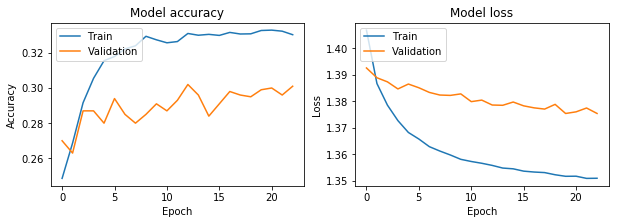

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plot_history(history.history)

In [23]:
def create_cnn_model_4(input_size = 10):
    inp = Input(shape=(input_size, 4))
    x = Conv1D(3, kernel_size=6, activation='relu')(inp)
#     x = MaxPooling1D(2)(x)
    x = Flatten()(x)
    x = Dense(4, activation='softmax')(x)
    model = Model(inp, x)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model
model = create_cnn_model_4(10)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 10, 4)             0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 5, 3)              75        
_________________________________________________________________
flatten_8 (Flatten)          (None, 15)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 64        
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


In [24]:
es = EarlyStopping(monitor='val_loss', verbose=1, patience=3)
history = model.fit(data.train1, data.train_ans, epochs=100, callbacks = [es], validation_data=(data.validate1, data.validate_ans),
                   verbose = 0)

Epoch 00008: early stopping


In [25]:
model.evaluate(data.test1, data.test_ans)

1000/1000 [==============================] - 0s 211us/step


[1.3812216053009032, 0.28599999999999998]

/home/bvdmitri/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


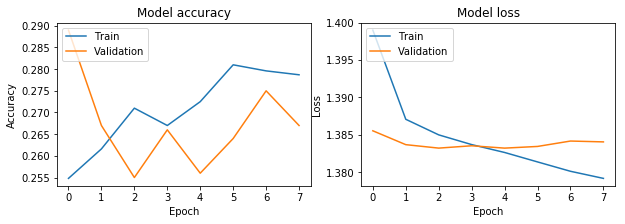

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plot_history(history.history)

Возьмем данные побольше

In [27]:
data = generate_data("../results/ecoli_100000_10000", 10, 0)[0]

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 10, 4)             0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 8, 3)              39        
_________________________________________________________________
flatten_10 (Flatten)         (None, 24)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 100       
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________
None
Train on 100000 samples, validate on 10000 samples
Epoch 1/100
100000/100000 [==============================] - 44s 436us/step - loss: 1.3865 - acc: 0.2668 - val_loss: 1.3787 - val_acc: 0.2771
Epoch 2/100
100000/100000 [==============================] - 47s 470us/step - 

/home/bvdmitri/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


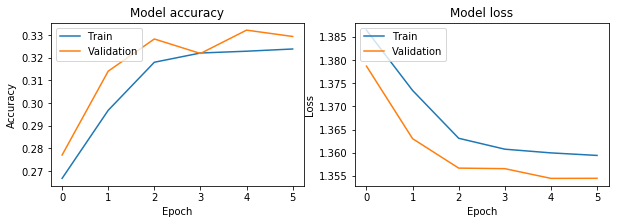

In [29]:
def create_cnn_model_4(input_size = 10):
    inp = Input(shape=(input_size, 4))
    x = Conv1D(3, kernel_size=3, activation='relu')(inp)
#     x = MaxPooling1D(2)(x)
    x = Flatten()(x)
    x = Dense(4, activation='softmax')(x)
    model = Model(inp, x)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model
model = create_cnn_model_4(10)
print(model.summary())

es = EarlyStopping(monitor='val_loss', verbose=1, patience=1)
history = model.fit(data.train1, data.train_ans, epochs=100, callbacks = [es], validation_data=(data.validate1, data.validate_ans),
                   verbose = 1)

print(model.evaluate(data.test1, data.test_ans))

import matplotlib.pyplot as plt
%matplotlib inline
plot_history(history.history)

# СТатистика

In [30]:
import glob
[print(x) for x in glob.glob("../results/cnn/*/*all_runs*")]
[print(x) for x in glob.glob("../results/cnn/*all_runs*")]

../results/cnn/2019-04-24-23-31/cnn_model_1_all_runs_p2_ecoli_100000_10000_12_0.pyob


[]

file ../results/cnn/2019-04-24-23-31/cnn_model_1_all_runs_p2_ecoli_100000_10000_12_0.pyob
Number of runs 7
MannwhitneyuResult(statistic=21.0, pvalue=0.350739054433307)


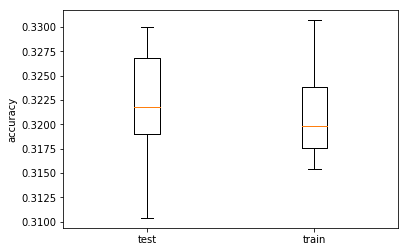

In [1]:
from data_loading import *
path = "../results/cnn/2019-04-24-23-31"
test, train = plot_hist(path)